## This is a preliminary example how to work with daemonflux

1. Install daemonflux:

    a) From PyPi: `pip install daemonflux`
    
    b) From source:
    
        * Clone the git repository `git clone https://github.com/mceq-project/daemonflux`
        * `cd ..`
        * `pip install -e .` (in editable mode, so the package gets updated after each `git pull`)
2. Follow this script, and report bugs on github


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from daemonflux import Flux
from matplotlib import rcParams

rcParams["figure.dpi"] = 125

In [3]:
# Create an instance of the Flux class with default settings
# Choices for location are 'generic', 'IceCube' and 'Kamioka'.
# Differences between locations are only due to the atmospheric model.
# For IceCube the zenith angle extends to 180 degrees (upgoing). The asymmetry between up and downgoing is only due to the atmosphere.
# For Kamioka the atmosphere is very close to USStd (generic) and differences are almost negligible.

fl = Flux(location="generic", use_calibration=True, debug=1)

In [4]:
# For comparisons disable the calibration.
# This is not a recommended setting, and it is not exactly corresponding to the DDM+GSF case from https://arxiv.org/abs/2205.14766

fl_nc = Flux(location="Kamioka", use_calibration=False, debug=1)

No calibration used.


In [5]:
egrid = np.logspace(0, 8)
print(fl.zenith_angles)

['0.0000', '18.1949', '25.8419', '31.7883', '36.8699', '41.4096', '45.5730', '49.4584', '53.1301', '56.6330', '60.0000', '63.2563', '66.4218', '69.5127', '72.5424', '75.5225', '78.4630', '81.3731', '84.2608', '87.1340', '90.0000']


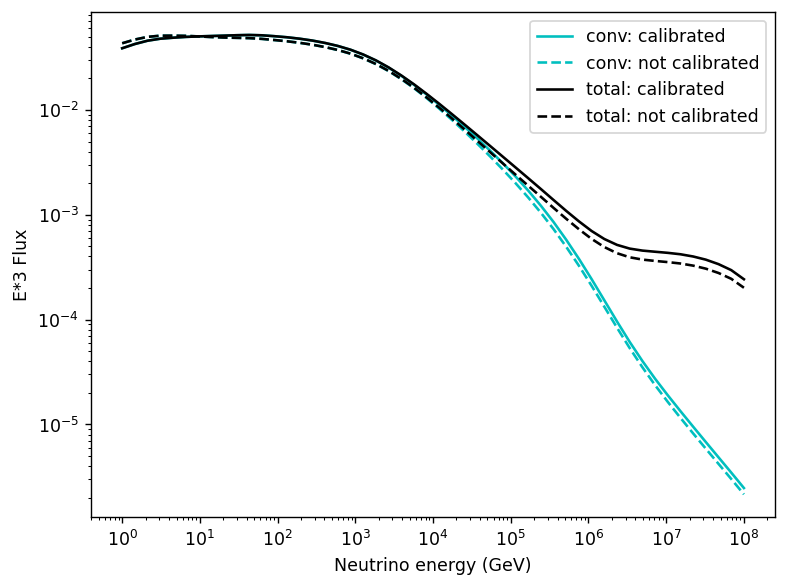

In [6]:
plt.figure()
plt.loglog(
    egrid, fl.flux(egrid, "60.0000", "numuflux"), color="c", label="conv: calibrated"
)
plt.loglog(
    egrid,
    fl_nc.flux(egrid, "60.0000", "numuflux"),
    color="c",
    ls="--",
    label="conv: not calibrated",
)
plt.loglog(
    egrid,
    fl.flux(egrid, "60.0000", "total_numuflux"),
    color="k",
    label="total: calibrated",
)
plt.loglog(
    egrid,
    fl_nc.flux(egrid, "60.0000", "total_numuflux"),
    color="k",
    ls="--",
    label="total: not calibrated",
)
plt.xlabel("Neutrino energy (GeV)")
plt.ylabel("E*3 Flux")
plt.legend()
plt.tight_layout()

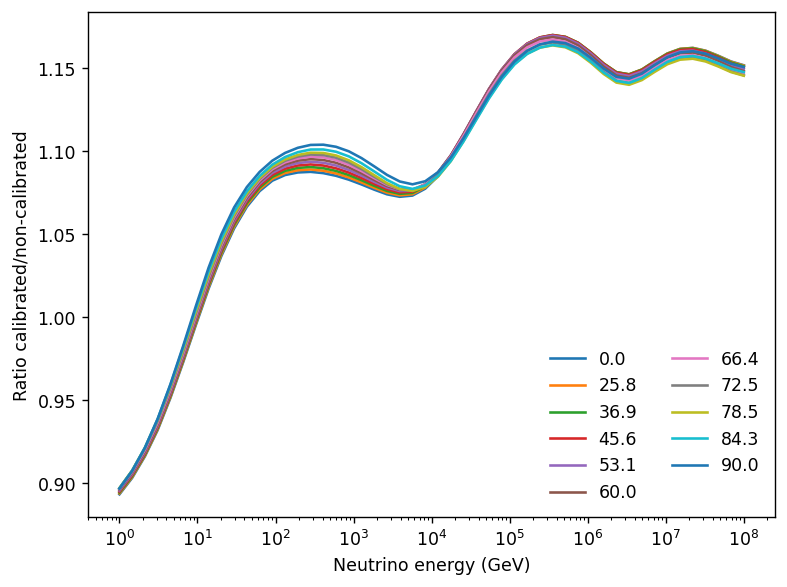

In [7]:
plt.figure()
# Compare calibrated vs non-calibrated for each zenith angle
for zen in sorted([float(z) for z in fl.zenith_angles])[::2]:
    plt.semilogx(
        egrid,
        fl.flux(egrid, zen, "numuflux") / fl_nc.flux(egrid, zen, "numuflux"),
        label=f"{zen:3.1f}",
    )
plt.xlabel("Neutrino energy (GeV)")
plt.ylabel("Ratio calibrated/non-calibrated")
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

In [8]:
# These are the knobs
fl.params.known_parameters

['K+_158G',
 'K+_2P',
 'K+_31G',
 'K-_158G',
 'K-_2P',
 'K-_31G',
 'n_158G',
 'n_2P',
 'p_158G',
 'p_2P',
 'pi+_158G',
 'pi+_20T',
 'pi+_2P',
 'pi+_31G',
 'pi-_158G',
 'pi-_20T',
 'pi-_2P',
 'pi-_31G',
 'GSF_1',
 'GSF_2',
 'GSF_3',
 'GSF_4',
 'GSF_5',
 'GSF_6']

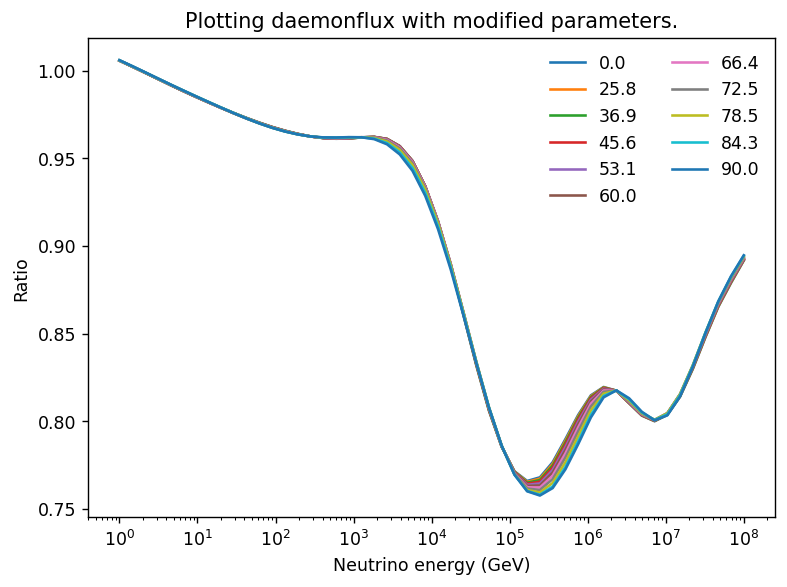

In [9]:
# How to modify tuning parameters
plt.figure()
plt.title("Plotting daemonflux with modified parameters.")
for zen in sorted([float(z) for z in fl.zenith_angles])[::2]:
    plt.semilogx(
        egrid,
        fl.flux(egrid, zen, "total_numuflux", params={"GSF_1": -1, "GSF_5": 2})
        / fl.flux(egrid, zen, "total_numuflux"),
        label=f"{zen:3.1f}",
    )
plt.xlabel("Neutrino energy (GeV)")
plt.ylabel("Ratio")
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

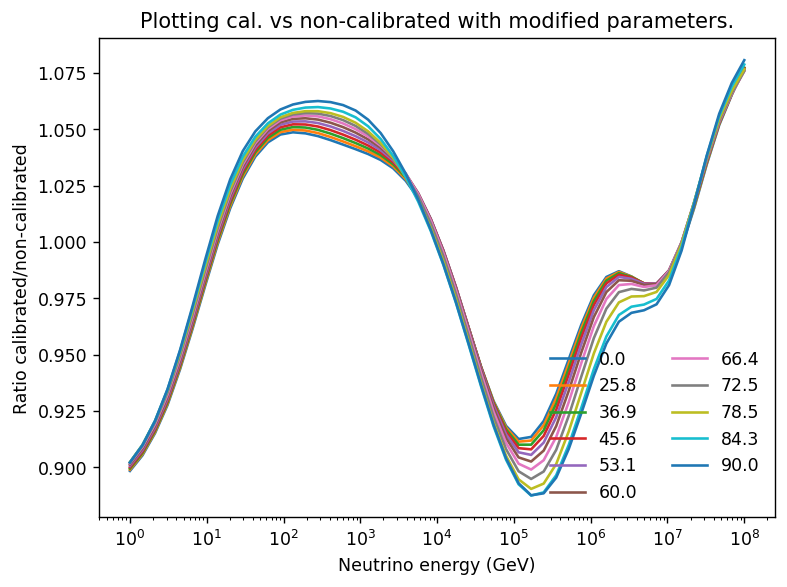

In [10]:
# How to modify tuning parameters
plt.figure()
plt.title("Plotting cal. vs non-calibrated with modified parameters.")
for zen in sorted([float(z) for z in fl.zenith_angles])[::2]:
    plt.semilogx(
        egrid,
        fl.flux(egrid, zen, "total_numuflux", params={"GSF_1": -1, "GSF_5": 2})
        / fl_nc.flux(egrid, zen, "total_numuflux", params={"GSF_1": -1, "GSF_5": 2}),
        label=f"{zen:3.1f}",
    )
plt.xlabel("Neutrino energy (GeV)")
plt.ylabel("Ratio calibrated/non-calibrated")
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

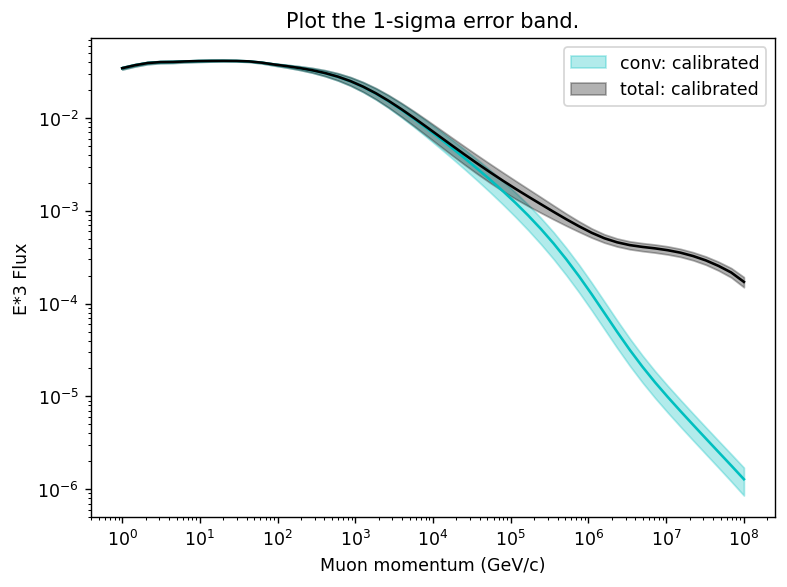

In [11]:
plt.figure()
plt.title("Plot the 1-sigma error band.")
flx = fl.flux(egrid, "15", "numuflux")
err = fl.error(egrid, "15", "numuflux")
plt.loglog(egrid, flx, color="c")
plt.fill_between(
    egrid, flx + err, flx - err, color="c", alpha=0.3, label="conv: calibrated"
)

flx = fl.flux(egrid, "15", "total_numuflux")
err = fl.error(egrid, "15", "total_numuflux")
plt.loglog(egrid, flx, color="k")
plt.fill_between(
    egrid, flx + err, flx - err, color="k", alpha=0.3, label="total: calibrated"
)

plt.xlabel("Muon momentum (GeV/c)")
plt.ylabel("E*3 Flux")
plt.legend()
plt.tight_layout()

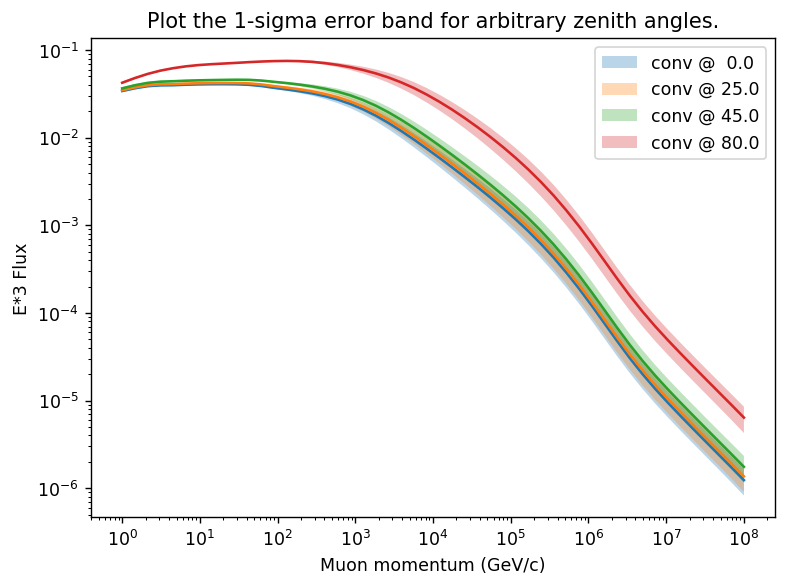

In [12]:
# Plot for arbitrary zenith angles
zeniths = [0.0, 25, "45", "80"]
plt.figure()
plt.title("Plot the 1-sigma error band for arbitrary zenith angles.")
for zen in zeniths:
    flx = fl.flux(egrid, zen, "numuflux")
    err = fl.error(egrid, zen, "numuflux")
    plt.loglog(egrid, flx)
    plt.fill_between(
        egrid, flx + err, flx - err, alpha=0.3, label=f"conv @ {float(zen):4.1f}"
    )

plt.xlabel("Muon momentum (GeV/c)")
plt.ylabel("E*3 Flux")
plt.legend()
plt.tight_layout()

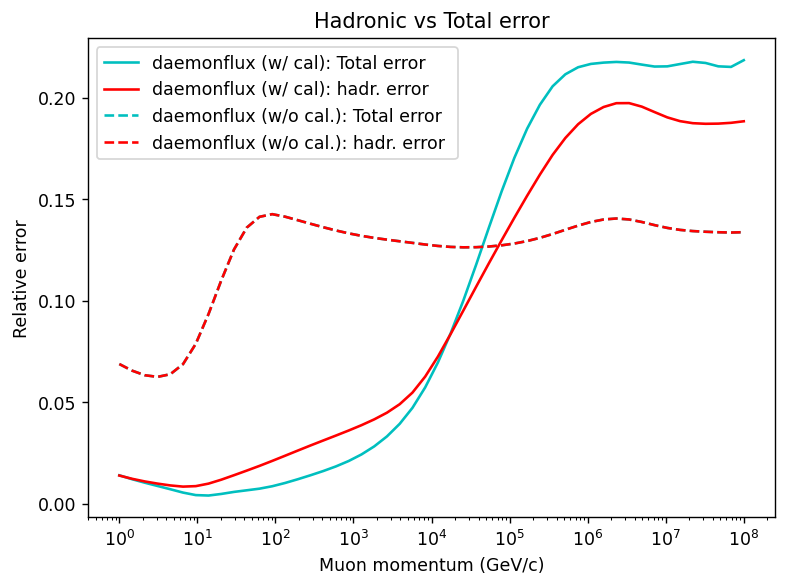

In [13]:
plt.figure()
plt.title("Hadronic vs Total error")
flx = fl.flux(egrid, "15", "muflux")
err_total = fl.error(egrid, "15", "muflux")
err_hadronic = fl.error(egrid, "15", "muflux", only_hadronic=True)
plt.semilogx(
    egrid, err_total / flx, color="c", label="daemonflux (w/ cal): Total error "
)
plt.semilogx(
    egrid, err_hadronic / flx, color="r", label="daemonflux (w/ cal): hadr. error "
)
flx = fl_nc.flux(egrid, "15", "muflux")
err_total = fl_nc.error(egrid, "15", "muflux")
err_hadronic = fl_nc.error(egrid, "15", "muflux", only_hadronic=True)
plt.semilogx(
    egrid,
    err_total / flx,
    color="c",
    ls="--",
    label="daemonflux (w/o cal.): Total error ",
)
plt.semilogx(
    egrid,
    err_hadronic / flx,
    color="r",
    ls="--",
    label="daemonflux (w/o cal.): hadr. error ",
)


plt.xlabel("Muon momentum (GeV/c)")
plt.ylabel("Relative error")
plt.legend()
plt.tight_layout()

In [15]:
# Test other claibration set
fl_wdeis = Flux(calibration_set="with_deis")

Output()

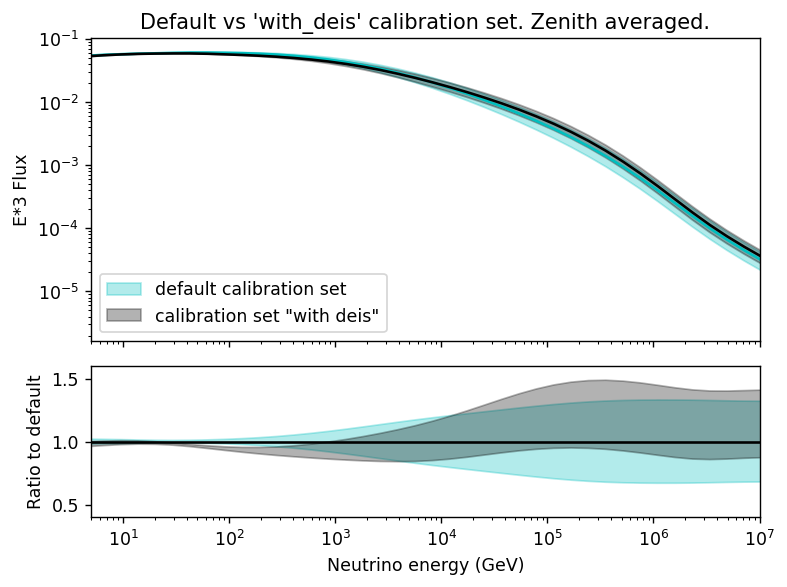

In [16]:
fig, ax = plt.subplots(2, 1, height_ratios=(2, 1), sharex=True)
ax[0].set_title("Default vs 'with_deis' calibration set. Zenith averaged.")
flxd = fl.flux(egrid, "average", "numuflux")
errd = fl.error(egrid, "average", "numuflux")
ax[0].loglog(egrid, flxd, color="c")
ax[0].fill_between(
    egrid,
    flxd + errd,
    flxd - errd,
    color="c",
    alpha=0.3,
    label="default calibration set",
)

flx = fl_wdeis.flux(egrid, "average", "numuflux")
err = fl_wdeis.error(egrid, "average", "numuflux")
ax[0].loglog(egrid, flx, color="k")
ax[0].fill_between(
    egrid,
    flx + err,
    flx - err,
    color="k",
    alpha=0.3,
    label='calibration set "with deis"',
)

ax[1].semilogx(egrid, flxd / flxd, color="k")
ax[1].fill_between(
    egrid, (errd + flxd) / flxd, (flxd - errd) / flxd, color="c", alpha=0.3
)
ax[1].fill_between(egrid, (err + flx) / flxd, (flx - err) / flxd, color="k", alpha=0.3)
ax[1].set_xlabel("Neutrino energy (GeV)")
ax[0].set_ylabel("E*3 Flux")
ax[1].set_ylabel("Ratio to default")
ax[1].set_ylim(0.4, 1.6)
ax[1].set_xlim(5, 1e7)
ax[0].legend()
plt.tight_layout()

In [31]:
assert fl.chi2() == 0.0, "The chi2 should be zero for when parameters not modified."
for p in np.linspace(-2, 2, 10):
    print(
        f"chi2 for GSF_1 = {p:3.1f} is {fl.chi2(params={'GSF_1': p}):3.1f} \t and for GSF_5 = {p:3.1f} is {fl.chi2(params={'GSF_5': p}):3.1f}"
    )
# Although the parameter ranges are all scaled to 1 sigma, the chi2 impact is different due to the off diagonal elements inf the covariance matrix.

chi2 for GSF_1 = -2.0 is 65.6 	 and for GSF_5 = -2.0 is 25.2
chi2 for GSF_1 = -1.6 is 39.7 	 and for GSF_5 = -1.6 is 15.3
chi2 for GSF_1 = -1.1 is 20.3 	 and for GSF_5 = -1.1 is 7.8
chi2 for GSF_1 = -0.7 is 7.3 	 and for GSF_5 = -0.7 is 2.8
chi2 for GSF_1 = -0.2 is 0.8 	 and for GSF_5 = -0.2 is 0.3
chi2 for GSF_1 = 0.2 is 0.8 	 and for GSF_5 = 0.2 is 0.3
chi2 for GSF_1 = 0.7 is 7.3 	 and for GSF_5 = 0.7 is 2.8
chi2 for GSF_1 = 1.1 is 20.3 	 and for GSF_5 = 1.1 is 7.8
chi2 for GSF_1 = 1.6 is 39.7 	 and for GSF_5 = 1.6 is 15.3
chi2 for GSF_1 = 2.0 is 65.6 	 and for GSF_5 = 2.0 is 25.2
